In [2]:
!pip install tensorflow
!pip install yfinance
!pip install scikit-learn
!pip install pandas
!pip install matplotlib 

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
     ------- -------------------------------- 0.5/3.0 MB 6.7 MB/s eta 0:00:01
     -------------------- ------------------- 1.5/3.0 MB 12.0 MB/s eta 0:00:01
     ----------------------------------- ---- 2.7/3.0 MB 15.4 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 14.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/108.7 kB ? eta -:--:--
   ---------------------------------------- 108.7/108.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-py

In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import datetime

# import to ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [18]:
# Choosing stock ticker symbol here - AAPL
ticker = 'NVDA'
data = yf.download(ticker, start='2020-01-01', end=datetime.datetime.today().strftime('%Y-%m-%d'))
data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


In [24]:
# Initializing MinMaxScaler to normalize the data b/w 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling data for training.
scaled_data = scaler.fit_transform(data)

In [30]:
# Defining training data as 80% of the total data. 
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:int(training_data_len), :]

# Creating empty list for features - x_train and target - y_train
x_train = []
y_train = []

# populate x_train with 60 days of data and y_train with the following day's closing price
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Past 60 days
    y_train.append(train_data[i, 0])       # Target: the next day’s close price

In [34]:
# List -> numpy arrays for model training
x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
# Reshape x_train to the format [samples, time steps, features] required for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [38]:
model = Sequential()

In [48]:
# first LSTM layer with 50 units and return sequences. 
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# dropout layer to prevent overfitting. 
model.add(Dropout(0.2))

In [52]:
# second layer of LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

In [56]:
# Dense layer with 25 units
model.add(Dense(units=25))
model.add(Dense(units=1))

In [58]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [60]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

973/973 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - loss: 0.0028


In [62]:
last_60_days=scaled_data[-60:]
x_future=last_60_days.reshape((1,last_60_days.shape[0],1))

In [64]:
future_predictions=[]
for i in range(30):
    pred = model.predict(x_future)
    future_predictions.append(pred[0,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

In [66]:
x_future = np.append(x_future[:, 1:, :], [[pred[0]]], axis=1)

In [68]:
future_predictions=scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

In [70]:
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast = pd.DataFrame(future_predictions, index=forecast_dates, columns=['Prediction'])

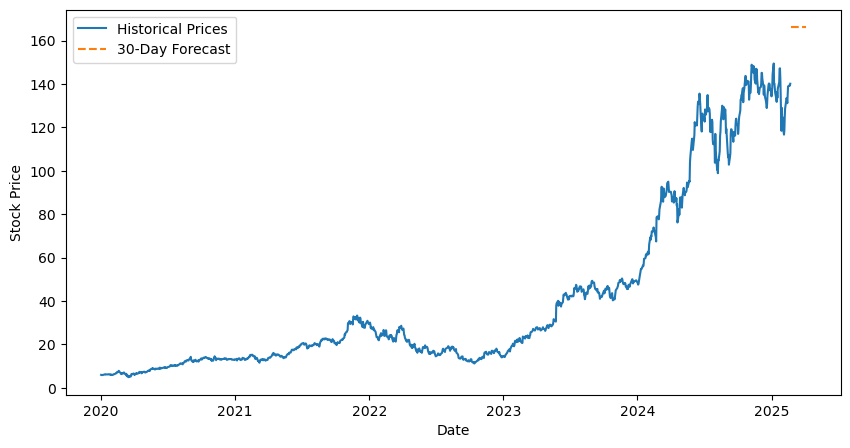

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Historical Prices')
plt.plot(forecast, label='30-Day Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# END OF CODE